In [17]:
import pandas as pd
from lenskit import batch,topn
from lenskit.metrics import topn as tn
from lenskit.algorithms import als
import numpy as np
from scipy import spatial
from numpy.linalg import norm
from numpy import dot

In [18]:
np.version.version

'1.16.0'

In [19]:
trainp=pd.read_csv('ratings20Mpoponlyforsample.csv')
trainf=pd.read_csv('ratings20Mfull.csv')
test=pd.read_csv('test_set_all.csv')

In [20]:
trainp.columns = ['user','item','rating']
trainf.columns = ['user','item','rating']
test.columns=['user','item','rating']

In [21]:
algof=als.BiasedMF(features=30,iterations=100)
algop=als.BiasedMF(features=30,iterations=100)
algof.fit(trainf)
algop.fit(trainp)

In [7]:
full_fmat=algof.user_features_
pop_fmat=algop.user_features_


In [8]:
fullind=algof.user_index_
popind=algop.user_index_

In [9]:
testusers=test['user'].unique().tolist()

In [10]:
user_simscore=pd.DataFrame(columns=['user','simscore'])
r=0

In [11]:
for user in testusers:
    indexf = fullind.get_loc(user)
    indexp = popind.get_loc(user)
    full_v=full_fmat[indexf]
    pop_v=pop_fmat[indexp]
    dot_product=dot(full_v,pop_v)/(norm(full_v)*norm(pop_v))
    user_simscore.loc[r]=[user,dot_product]
    r=r+1
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f7c3b60b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5fb110be48>]], dtype=object)

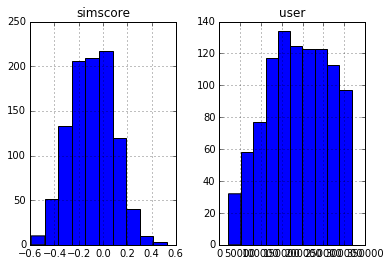

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99bc5500b8>,
      dtype=object)

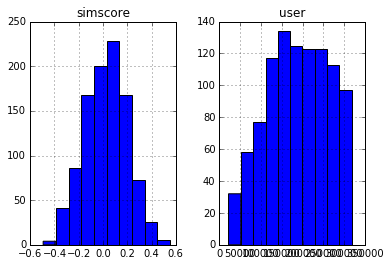